<a href="https://colab.research.google.com/github/simodepth96/Data-Science-Portfolio/blob/main/EURO_2024_EDA%2C_Correlation_and_Causation_Analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#⚽EURO 2024 - Exploratory Data Analysis (EDA)

In this project, I explored the performances of international teams throughout the EURO 2024 football tournament.

The study focuses on an Exploratory Data Analysis (EDA) of the international teams' performances, examining several metrics and various dimensions such as passes, possession, assists, and more.

Lastly, a rough causation analysis has been conducted in the attempt to unpack the underlying factors leading teams to score goals.

##🔬Purpose of the analysis
The purpose of this analysis is to identify outstanding patterns amongst participants to help formulate the right questions or assumptions around the main characters of the major European football kermesse.

##Important Notes
1. ⚠️ Please note that this study may be affected by judgmental errors and may not be entirely accurate. The motives that inspired each EDA task may have been influenced by confirmation and outcome biases or heuristic thinking.
2. ⚠️ The number of games played represents a sunk factor potentially drifting the accuracy of the analysis due to the format of the tournament. In other words, be aware the descriptive insights may be skewed towards Spain or England due to having more games being played on their back.
3. ⚠️ Above all, please bear in mind that this is a practical exercise conducted by an aspiring data analyst.

---
> Made by [![Follow](https://img.shields.io/twitter/follow/SimoneDePalma2?style=social)](https://www.linkedin.com/in/simodepth96/)
> Follow me [![Follow](https://img.shields.io/badge/LinkedIn-Follow-blue?style=social&logo=linkedin)](https://www.linkedin.com/in/simodepth96/)




##Methodology

The analysis has been conducted using a data-informed, disciplined approach, which can be summarized in the following bullet points:

1. **Data collection**. [fbref](https://fbref.com/) has been used as the data source.
2. **Data pre-processing/wrangling** - Once uploaded onto the notebook, extensive data pre-processing was conducted. Please note that on some occasions, data was pre-processed and wrangled beforehand due to the lack of support for certain tasks from Python.
3. **Univariate Analysis** - Once pre-processed, selected variables were described to identify potential patterns. This section includes a deep dive into central tendency measures.
4. **Bivariate Analysis** - In this section, relationships were detected to identify the potential influence of one variable on another.
3. **Data visualization** - Complementary to the above sections, data visualization tools were used throughout the notebook to continuously investigate relationships between categorical and numerical variables. The process included using lollipop charts, heatmaps, pairplots, and scatterplots.

In [20]:
#@title Install and import libraries
%%capture
!pip install adtk advertools -q plotly --upgrade adviz
!pip install lets-plot -U
!pip install pytimetk
!pip install statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf
import pytimetk as tk
import pandas as pd
import numpy as np
from IPython.display import display_html
import matplotlib as mpl
from cycler import cycler
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import advertools as adv
import adviz
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#import kaleido.scopes.plotly as kaleido
from webcolors import hex_to_rgb
import plotly.express as px

#to reset the original pandas tables rendering
from google.colab import data_table
data_table.disable_dataframe_formatter()
import datetime
from pandas.api.types import CategoricalDtype

from lets_plot import *
from lets_plot.mapping import as_discrete

LetsPlot.setup_html()

# apply some cool styling
plt.style.use("ggplot")
mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['lines.linestyle'] = '--'


In [24]:
#@title Import Dataset
'''
dataset has been imported originally from https://fbref.com/en/comps/676/stats/UEFA-Euro-Stats
'''

main = pd.read_excel('/content/Untitled spreadsheet (1).xlsx')
main.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Albania,19,27.0,35.7,3,33,270,3.0,3,1,4,3,0,0,7,0,2.4,2.4,1.6,4.0,33,61,1.00,0.33,1.33,1.00,1.33,0.81,0.53,1.34,0.81,1.34
1,Austria,19,27.0,52.8,4,44,360,4.0,6,5,11,5,1,1,12,0,6.9,6.1,5.3,11.4,75,176,1.50,1.25,2.75,1.25,2.50,1.73,1.31,3.04,1.53,2.85
2,Belgium,18,27.8,55.0,4,44,360,4.0,2,1,3,2,0,0,7,0,4.5,4.5,3.1,7.6,75,132,0.50,0.25,0.75,0.50,0.75,1.12,0.78,1.89,1.12,1.89
3,Croatia,19,28.6,55.7,3,33,270,3.0,2,1,3,2,0,2,7,0,5.7,4.0,3.5,7.6,62,124,0.67,0.33,1.00,0.67,1.00,1.89,1.17,3.07,1.35,2.52
4,Czechia,21,26.8,40.7,3,33,270,3.0,3,2,5,3,0,0,13,2,5.1,5.1,3.2,8.2,44,80,1.00,0.67,1.67,1.00,1.67,1.69,1.06,2.74,1.69,2.74


#Data Wrangling or pre-processing
In this section we prepare the dataset to the EDA by polishing off values that we might not need to process

In [25]:
#remove columns we don't need for the analysis
main.drop(columns=["Starts", "Min", "90s", "MP", "G+A", "PKatt", "G+A", "G-PK", "G+A-PK", "xG", "xAG",
    "xG+xAG", "npxG", "npxG+xAG", 'xG.1', 'xAG.1', 'npxG.1', 'npxG+xAG.1', 'G+A.1',
    'G-PK.1'], inplace=True)
print(main.columns)

Index(['Squad', '# Pl', 'Age', 'Poss', 'Gls', 'Ast', 'PK', 'CrdY', 'CrdR',
       'PrgC', 'PrgP', 'Gls.1', 'Ast.1'],
      dtype='object')


In [26]:
# Rename columns to improve reading
rename_dict = {
    'Squad': 'Team',
    '# Pl': 'Players',
    'Age': 'Average Age',
    'Poss': 'Possession',
    'Gls': 'Goals',
    'Ast': 'Assists',
    'PK': 'Penalties',
    'CrdY': 'Yellow Cards',
    'CrdR': 'Red Cards',
    'PrgC': 'Progressive Carries',
    'PrgP': 'Progressive Passes',
    'Gls.1': 'Goals per 90',
    'Ast.1': 'Assists per 90'
}
main.rename(columns=rename_dict, inplace=True)

# Replace all NaN values with 0
main.fillna(0, inplace=True)

# Convert the 'Average Age' column to integer
main['Average Age'] = main['Average Age'].astype(int)

main.head()

,Team,Players,Average Age,Possession,Goals,Assists,Penalties,Yellow Cards,Red Cards,Progressive Carries,Progressive Passes,Goals per 90,Assists per 90
0,Albania,19,27,35.7,3,1,0,7,0,33,61,1.00,0.33
1,Austria,19,27,52.8,6,5,1,12,0,75,176,1.50,1.25
2,Belgium,18,27,55.0,2,1,0,7,0,75,132,0.50,0.25
3,Croatia,19,28,55.7,2,1,0,7,0,62,124,0.67,0.33
4,Czechia,21,26,40.7,3,2,0,13,2,44,80,1.00,0.67


#Understanding the big picture

In this phase we are concerned in understanding what the dataset is composed of.




In [ ]:
#@title Size of the dataset: number of columns + length of dataset
print(main.shape)

(24, 13)


In [ ]:
#@title Visualize the last part of the dataset
main.tail()

,Team,Players,Average Age,Possession,Goals,Assists,Penalties,Yellow Cards,Red Cards,Progressive Carries,Progressive Passes,Goals per 90,Assists per 90
19,Slovenia,19,26,32.3,2,1,0,11,0,47,85,0.46,0.23
20,Spain,25,26,58.1,14,13,0,17,1,201,356,1.91,1.77
21,Switzerland,20,29,47.0,8,5,0,9,0,90,189,1.50,0.94
22,Türkiye,23,26,49.4,8,6,0,19,1,103,175,1.60,1.20
23,Ukraine,23,25,51.3,2,2,0,3,0,56,116,0.67,0.67


In [ ]:
#@title basic summary statistics on the dataset
main.describe()

,Players,Average Age,Possession,Goals,Assists,Penalties,Yellow Cards,Red Cards,Progressive Carries,Progressive Passes,Goals per 90,Assists per 90
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,20.541667,27.000000,48.841667,4.458333,3.12500,0.375000,9.625000,0.208333,79.083333,165.125000,0.948333,0.652083
std,1.955575,1.103355,8.880850,3.438644,2.98274,0.646899,3.645277,0.508977,46.996685,98.028085,0.500762,0.437184
min,18.000000,25.000000,32.300000,1.000000,1.00000,0.000000,3.000000,0.000000,23.000000,53.000000,0.320000,0.160000
25%,19.000000,26.000000,41.300000,2.000000,1.00000,0.000000,7.000000,0.000000,46.750000,85.000000,0.522500,0.330000
50%,20.000000,27.000000,51.050000,3.000000,2.00000,0.000000,9.000000,0.000000,62.000000,130.000000,0.960000,0.500000
75%,21.250000,28.000000,54.225000,6.500000,5.00000,1.000000,11.250000,0.000000,105.250000,204.500000,1.155000,0.752500
max,25.000000,29.000000,66.600000,14.000000,13.00000,2.000000,19.000000,2.000000,201.000000,356.000000,2.060000,1.770000


In [ ]:
#@title Missing data
main.isna().sum()

Team                   0
Players                0
Average Age            0
Possession             0
Goals                  0
Assists                0
Penalties              0
Yellow Cards           0
Red Cards              0
Progressive Carries    0
Progressive Passes     0
Goals per 90           0
Assists per 90         0
dtype: int64

In [ ]:
#@title Check for Duplicate rows
main.duplicated().sum()

0

#Univariate Analysis

After describing the dataset in its entirety,now it's time to **describe variables**




In [27]:
#@title Distribution of age

fig = px.histogram(main, x='Average Age', nbins=10, title='Distribution of Age')

# Customize the layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    showlegend=False
)

# Display the chart
fig.show()

In [28]:
#@title Distribution of Avg.Age by Team

fig = px.bar(main, x='Team', y='Average Age', title='Avg. Age by International Team')

# Customize the layout
fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Average Age',
    xaxis_tickangle=-45,
    showlegend=False
)

# Display the chart
fig.show()


In [29]:
#@title Distribution of Goals & Assists

fig = make_subplots(rows=1, cols=2, subplot_titles=("Goals", "Assists"))

# Plot for Goals
fig.add_trace(go.Histogram(x=main['Goals'], name='Goals'), row=1, col=1)

# Plot for Assists
fig.add_trace(go.Histogram(x=main['Assists'], name='Assists'), row=1, col=2)

# Update layout
fig.update_layout(title_text="Distribution of Goals and Assists", showlegend=False)

# Display the plot
fig.show()


#Bivariate Analysis

This is helpful to find interesting relationships that show the influence of one varibale on the other.

A pairplot would return a full picture of all the relationships among the dataset's variables.

Despite computationally expensive, this can work out good if used with a relatively small dataset (few variables).


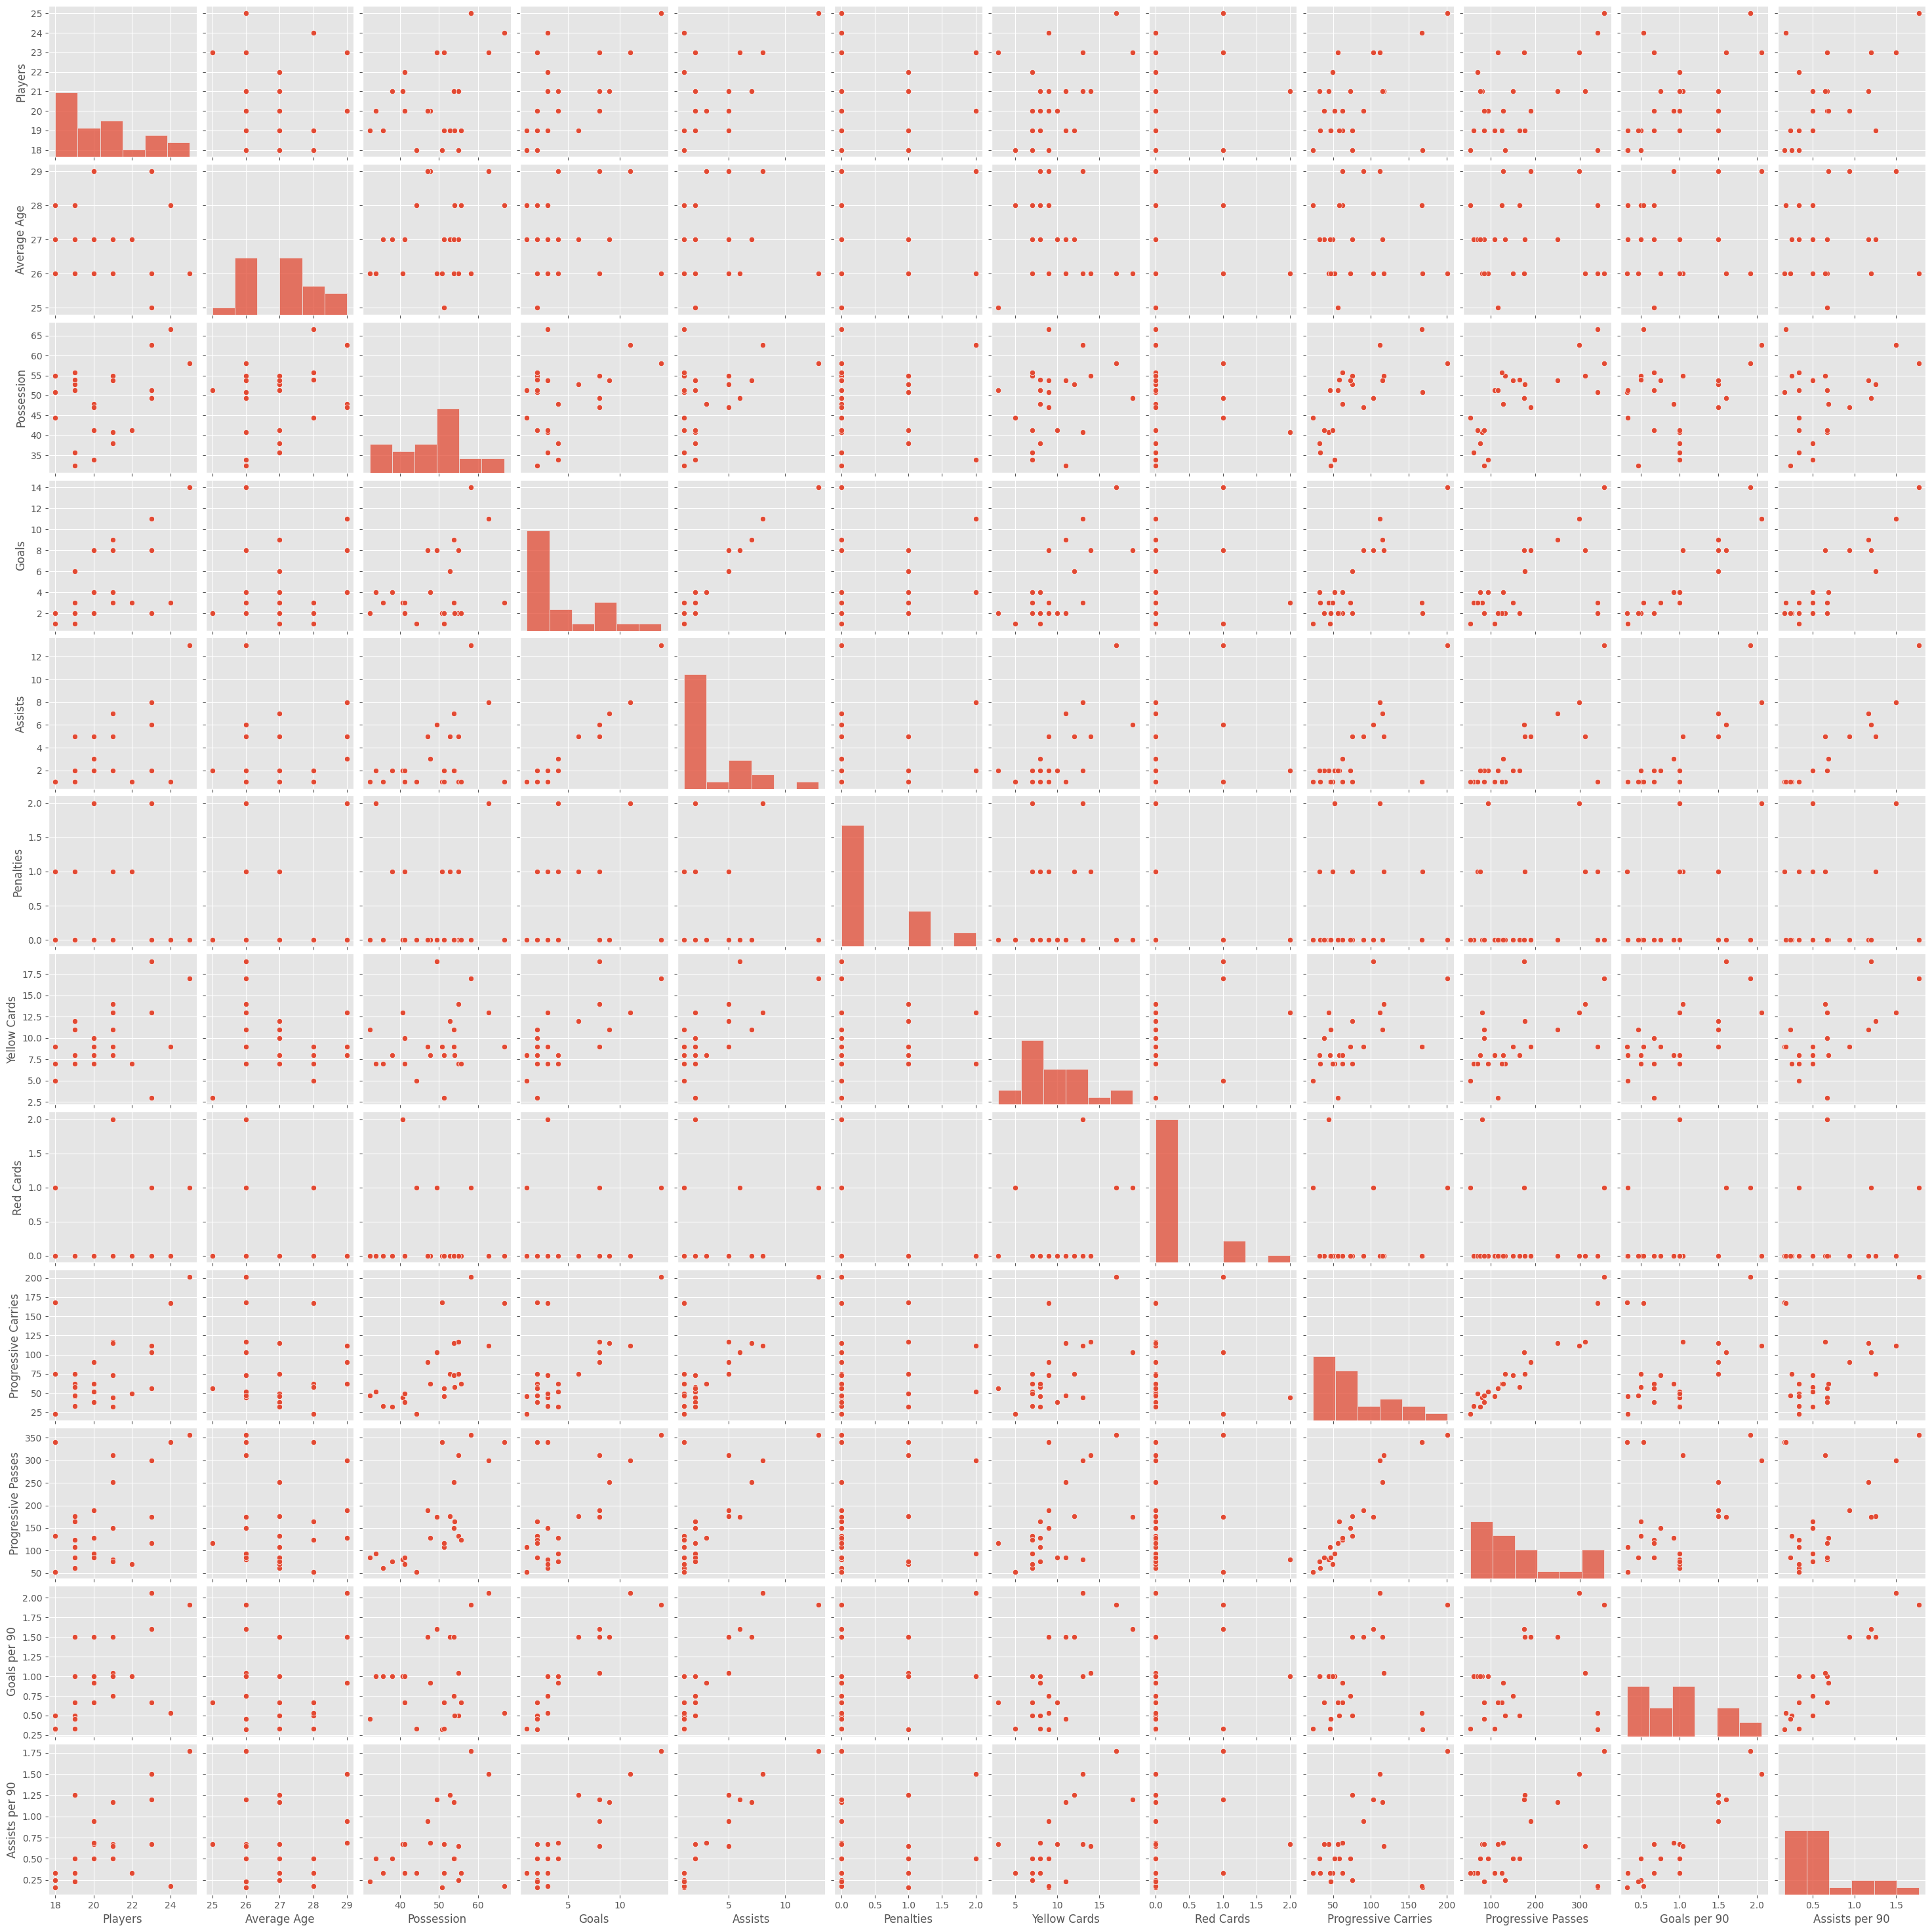

In [ ]:
#@title Bivariate Analysis Overview
import seaborn as sns

sns.pairplot(main)

In [46]:
#@title Goals by Team (cumulative sum)

goals = main.groupby('Team')['Goals'].sum().reset_index()
assist = main.groupby('Team')['Assists'].sum().reset_index()

# Sort by Goals and Assists
goals = goals.sort_values('Goals', ascending=False)
assist = assist.sort_values('Assists', ascending=False)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Goals by Team", "Assists by Team"))

# Plot for Goals
fig.add_trace(go.Bar(x=goals['Team'], y=goals['Goals'], name='Goals'), row=1, col=1)

# Plot for Assists
fig.add_trace(go.Bar(x=assist['Team'], y=assist['Assists'], name='Assists'), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Goals & Assists by Team",
    showlegend=False,
    xaxis=dict(tickangle=-30),
    xaxis2=dict(tickangle=-30)
)

# Adding annotations
fig.add_annotation(
    text="*Data skewed towards the International Team that played more games during the tournament",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,  # Positioning the annotation below the plots
    showarrow=False,
    font=dict(size=11)
)
# Display the plot
fig.show()

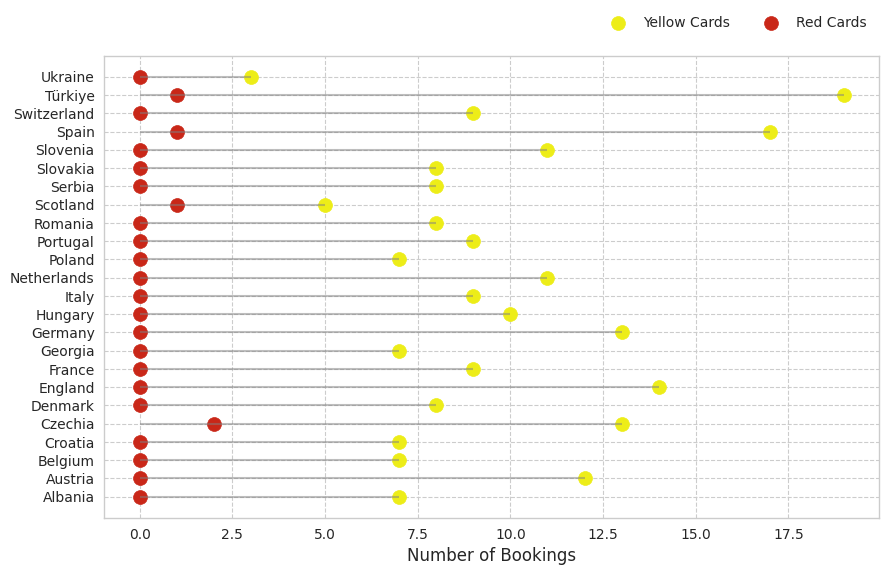

In [50]:
#@title Yellow Cards vs Red Cards by Team

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Create the lollipop chart
ax.hlines(y=main["Team"], xmin=0, xmax=main["Yellow Cards"], color='gray', alpha=0.5)
ax.scatter(main["Yellow Cards"], main["Team"], color='#eded18', label='Yellow Cards', s=100)
ax.scatter(main["Red Cards"], main["Team"], color='#c92718', label='Red Cards', s=100)

# Add labels
ax.set_xlabel("Number of Bookings")

# Apply Seaborn style for the grid
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Enable gridlines
#ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Show the legend
ax.legend()
plt.legend(ncol=2, bbox_to_anchor=(1, 1.03), loc="lower right", frameon=False)

# Show the plot
plt.show()

In [47]:
#@title Boooking cards by Team (cumulative sum)

ycrd = main.groupby('Team')['Yellow Cards'].sum().reset_index()
rcrd = main.groupby('Team')['Red Cards'].sum().reset_index()

# Sort by Goals and Assists
ycrd = ycrd.sort_values('Yellow Cards', ascending=False)
rcrd = rcrd.sort_values('Red Cards', ascending=False)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Yellow Cards by Team", "Red Cards by Team"))

# Plot for Goals
fig.add_trace(go.Bar(x=ycrd['Team'], y=ycrd['Yellow Cards'], name='Yellow Cards'), row=1, col=1)

# Plot for Assists
fig.add_trace(go.Bar(x=rcrd['Team'], y=rcrd['Red Cards'], name='Red Cards'), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Boookings by Team",
    showlegend=False,
    xaxis=dict(tickangle=-30),
    xaxis2=dict(tickangle=-30)
)

# Adding annotations
fig.add_annotation(
    text="*Data skewed towards the International Team that played more games during the tournament",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,  # Positioning the annotation below the plots
    showarrow=False,
    font=dict(size=11)
)
# Display the plot
fig.show()

##Progressive Carry vs Progressive Passes
A **progressive carry** is when a player moves the ball a significant distance towards the opponent's goal through dribbling or running with the ball

Example: A midfielder dribbling past opponents and moving the ball from the midfield area into the final third of the pitch.

---

A **progressive pass** is a forward pass that significantly advances the ball towards the opponent's goal.

Example: A defender making a long pass that bypasses the midfield and reaches a forward player in an advanced position.

In [48]:
#@title Passes Type by Team

prg_carries = main.groupby('Team')['Progressive Carries'].sum().reset_index()
prg_passes = main.groupby('Team')['Progressive Passes'].sum().reset_index()

# Sort by Goals and Assists
prg_carries = prg_carries.sort_values('Progressive Carries', ascending=False)
prg_passes = prg_passes.sort_values('Progressive Passes', ascending=False)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Progressive Carries by Team", "Progressive Passes by Team"))

# Plot for Goals
fig.add_trace(go.Bar(x=prg_carries['Team'], y=prg_carries['Progressive Carries'], name='Progressive Carries'), row=1, col=1)

# Plot for Assists
fig.add_trace(go.Bar(x=prg_passes['Team'], y=prg_passes['Progressive Passes'], name='Progressive Passes'), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Passes Type by Team",
    showlegend=False,
    xaxis=dict(tickangle=-30),
    xaxis2=dict(tickangle=-30)
)

# Adding annotations
fig.add_annotation(
    text="*Data skewed towards the International Team that played more games during the tournament",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,  # Positioning the annotation below the plots
    showarrow=False,
    font=dict(size=11)
)
# Display the plot
fig.show()


# Correlation Analysis

To investigate the extent to which variables accounted in our EURO 2024  dataset are connected to each other, the next section will cover a brief correlation analysis.

**Heat maps** are useful tools for identifying correlated variables in a dataset. In the first part of the next section, we will leverage a **correlation matrix** with the shapes of a heatmap.

We are going to lean on **Spearman**'s coefficient to reduce the chances of stumbling upon potential outliers.

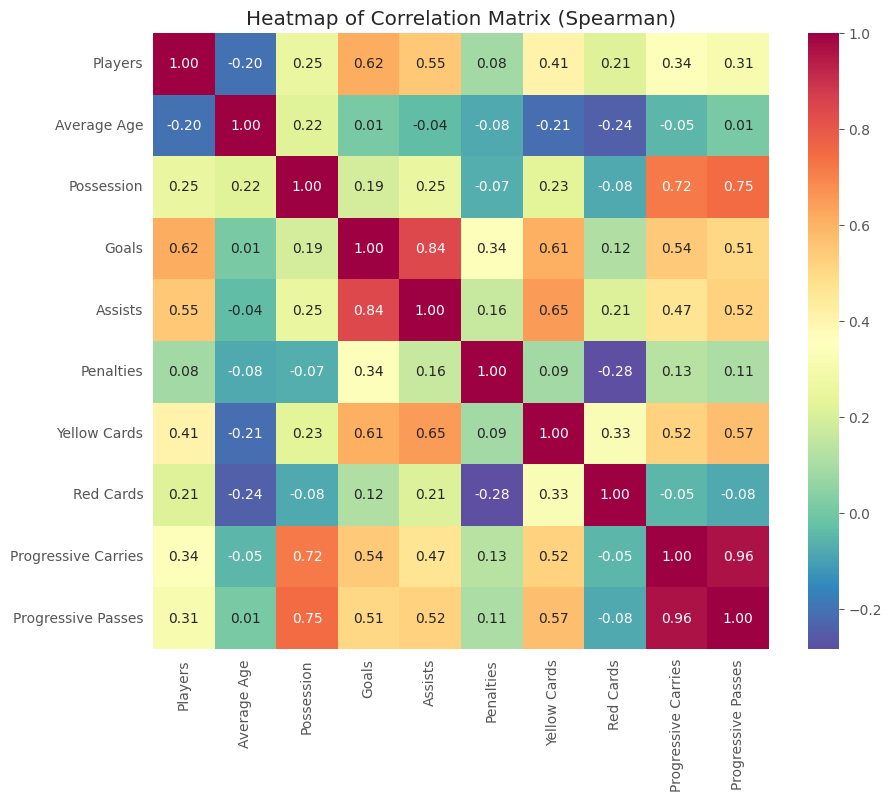

In [33]:
corr_main = main.copy()

corr_main = corr_main.drop(columns=['Team','Goals per 90', 'Assists per 90'])

# Compute the Spearman's rank correlation matrix
corrmat = corr_main.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
hm = sns.heatmap(corrmat,
                 cbar=True,
                 square=True,
                 fmt='.2f',
                 annot=True,  # to display the correlation values
                 annot_kws={'size': 10},
                 yticklabels=corrmat.columns,
                 xticklabels=corrmat.columns,
                 cmap="Spectral_r")

# Show the plot
plt.title('Heatmap of Correlation Matrix (Spearman)')
plt.show()

The insights served from the correlation matrix suggest we pick up on the following pair of variables to double down on our correlation analysis.

- players - goals

- yellow cards - assists

- assists vs yellow cards

- possession - progr passes

In [15]:
#@title Correlation between Players and Goals
import plotly.graph_objects as go

spearman_pl_gls = main['Players'].corr(main['Goals'], method="spearman")

# Create the scatter plot
fig = px.scatter(main, x='Players', y='Goals', trendline='ols', title='Players vs Goals')

# Add a dummy trace with the Spearman correlation as legend title
fig.add_trace(go.Scatter(x=[None], y=[None], name=f'Spearman Correlation: {spearman_pl_gls.round(2)}', showlegend=True))

# Show the plot
fig.show()


In [49]:
#@title Players vs Goal by Team

fig = px.scatter(main, x="Players", y="Goals",
                 size="Goals", color="Team", title="Players vs Goal by Team",
                 hover_name="Team", log_x=True, size_max=60)

# Add annotations below the title
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=11)
)

fig.add_annotation(
    text="*Corr Pearson = 0.62 **Data overfitted by # of matches played",
    xref="paper", yref="paper",
    x=0.15, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=11)
)

fig.show()


In [33]:
#@title Corelation between Yellow cards vs Assists

spearman_ycr_ass = main['Yellow Cards'].corr(main['Assists'], method="spearman")

# Create the scatter plot
fig = px.scatter(main, x='Yellow Cards', y='Assists', trendline='ols', title='Yellow Cards vs Assists')

# Add a dummy trace with the Spearman correlation as legend title
fig.add_trace(go.Scatter(x=[None], y=[None], name=f'Spearman Correlation: {spearman_ycr_ass.round(2)}', showlegend=True))

# Show the plot
fig.show()


The above is a clear example of **spurious correlation**, that is the correlation between features is most likely not as factual as it appears.

#Causation Analysis

In this section, we're using SHAP to explain the impact of each feature on a specific variable.

Goals is a feature predictor benefitting from a moderate correlation against a number of parameters. We might be interested to point out the most impactful variables causing International teams to score goals during the tournament.

Hence, we temporarily suspend the EDA to find out the motif prompting teams to score goals by running through the following list of moderately correlated variables to the subject of the analysis:

- Players
- Progressive Passes
- Progressive Carries
- Yellow Cards

*Assists have been excluded to prevent multicollinearity or spurious correlations

>**What did it take to any International side to score Goals at EURO 2024?**

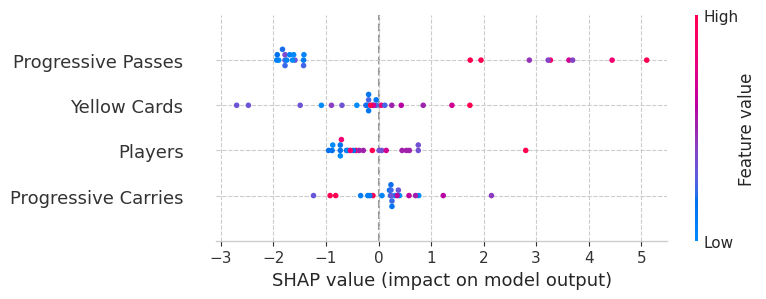

In [19]:
!pip install shap

import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

X = main[['Players', 'Yellow Cards', 'Progressive Carries', 'Progressive Passes']]What did it take to any International side to score Goals at EURO 2024?
y = main['Goals']
model = DecisionTreeRegressor()
model.fit(X, y)

# Step 3: Use SHAP to explain the model predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Plot a SHAP beeswarm chart
shap.summary_plot(shap_values, X, plot_type="dot")


SHAP values are used to showcase the impact of each feature on the model's prediction.

- Features like **Progressive Passes** and Progressive Carries show that higher values typically increase the chances of scoring a Goal. Importantly, passes performed close to the opponent's box (**Progressive Passes**) seemed to dramatically increase the chances of goals.
- Yellow Cards have a relatively neutral impact across different values.
- The impact of the number of Players employed varies widely, suggesting this feature has a complex relationship with Goals' predictions.


